In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
%matplotlib inline
import pyfits
import numpy as np
import matplotlib.pyplot as plt

path = '/Users/thbrown/AA_project/TOBY_STACKING/SAMPLES/FULL/masters/'

# read in sample table

hdulist = pyfits.open(path+'sample_grp.fits')
tbdata = hdulist[1].data
ID = tbdata['ID']
ms = tbdata['lgMst_median']
halo = tbdata['logMh_Mst']
flag = tbdata['flag_mstar'] #1 = BGG, 2 = satelite
grp_id = tbdata['grp_id']


In [4]:
# logic table
# From Yang DR7 group catalogue readme.
#    For very small groups, no masses are assigned (with log M_halo = 0 and f_{edge}=0.0).
#    However one can obtain an estimation of the halo mass using the mean
#    relation between the stellar mass of the central galaxy and the halo mass
#    obtained in Yang et al. (2009b).

# functional M*-Mh relation Yang+2009
M0_0 = 10**10.3061
M1_0 = 10**11.0404
a_0 = 0.3146 # Yang+09
b_0 = 4.5427
M0_1 = 10**10.86
M1_1 = 10**12.08
a_1 = 0.22 # Yang+08
b_1 = 1.61
h = 0.73 # little h

Mh = (10**(np.linspace(10,15, 1e3)))/h

# truth values of stellar mass
ms_logical = M0_0 * (Mh/M1_0)**(a_0+b_0) / (1 + Mh/M1_0)**b_0 /0.73**2

# Yang+08 alpha, beta
ms_logical_1 = M0_1 * (Mh/M1_1)**(a_1+b_1) / (1 + Mh/M1_1)**b_1 /h**2


plot before...


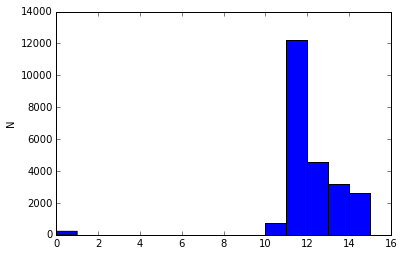

No. galaxies with log Mh = 0:  217


NameError: name 'ms_logical' is not defined

In [5]:
bin_size = 1; min_edge = 0; max_edge = 15
N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
bin_list = np.linspace(min_edge, max_edge, Nplus1)

print ''
print 'plot before...'
plt.hist(halo, bins=bin_list)
plt.ylabel('N')
plt.show()


print 'No. galaxies with log Mh = 0: ', len(halo[(halo  == 0.)])


# interpolate halo values
idx = np.where(halo  == 0.)
ms_lin = 10**ms
mhalo_interp = np.interp(ms_lin[idx], ms_logical, Mh)
# assign back to halo array
halo[idx] =  np.log10(mhalo_interp)


8664

...and after.


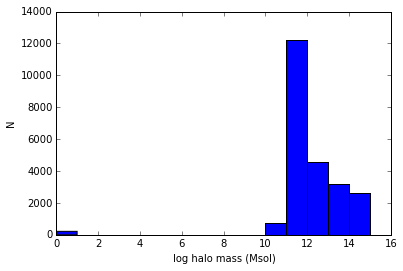

number of satellites w/o central counterparts:  217


In [6]:
# Centrals and Satellites
# the prescription is only for central galaxies thus we must find the central associated with each group and use that Mh.

x = halo[idx]
y = grp_id[idx]
x[(flag[idx]==2)] = 0 # set satellite halos to zero

print len(halo[(flag==2)])
# plt.hist(x)
# plt.ylabel('count')
# plt.show()

# assign the central Mh to it's satellites.
for i in range(len(x)):
    if (x[i] == 0) & (x[(flag[idx]==1) & (y == y[i])] > 1):
        x[i] = x[(flag[idx]==1) & (y == y[i])]

halo[idx] = x ; # put corrected halo mass values in main array.

# plt.hist(x)
# plt.xlabel('Log halo mass (Msol)')
# plt.ylabel('count')
# plt.show()

print ''
print '...and after.'
plt.hist(halo, bins=bin_list)
plt.xlabel('log halo mass (Msol)')
plt.ylabel('N')
plt.show()

print 'number of satellites w/o central counterparts: ', len(x[(x==0)])

(7, 12)

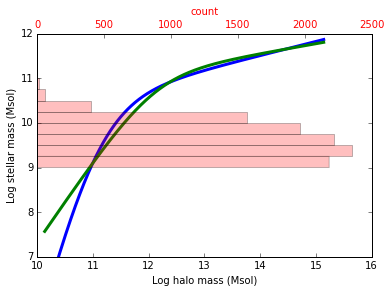

In [7]:
# plot log M* - log Mh relation from Yang+09
fig, ax1 = plt.subplots()
ax1.set_xlabel('Log halo mass (Msol)')
ax1.set_ylabel('Log stellar mass (Msol)')
ax1.plot(np.log10(Mh), np.log10(ms_logical), linewidth =3)
ax1.plot(np.log10(Mh), np.log10(ms_logical_1), linewidth =3)

bin_size = 0.25; min_edge = 9; max_edge = 12
N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
bin_list = np.linspace(min_edge, max_edge, Nplus1)

# histogram of 'real' stellar masses
binwidth = 0.2
ax2 = ax1.twiny()
ax2.hist(ms[idx], color='r', orientation='horizontal', alpha=0.25, bins = bin_list)
ax2.set_xlabel('count', color='r')
for tl in ax2.get_xticklabels():
    tl.set_color('r')
plt.ylim(7,12)
    

(10, 15)

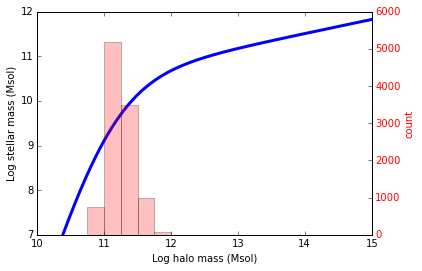

In [8]:
# plot log M* - log Mh relation with Mhalo histogram

fig, ax1 = plt.subplots()
ax1.set_xlabel('Log halo mass (Msol)')
ax1.set_ylabel('Log stellar mass (Msol)')
ax1.plot(np.log10(Mh), np.log10(ms_logical), linewidth =3, color='b')


bin_size = 0.25; min_edge = 9; max_edge = 12
N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
bin_list = np.linspace(min_edge, max_edge, Nplus1)


ax2 = ax1.twinx()
ax2.hist(halo[idx], color='r', alpha=0.25, bins = bin_list)
ax2.set_ylabel('count', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
ax1.set_ylim(7,12)
ax1.set_xlim(10,15)

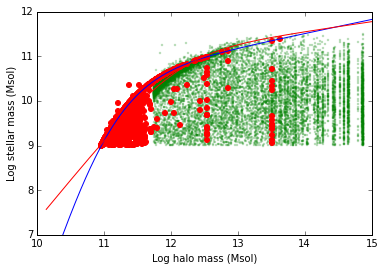

In [9]:
# comparison of halo masses
# green = abundance matched values
# red = Yang+09 model
plt.xlabel('Log halo mass (Msol)')
plt.ylabel('Log stellar mass (Msol)')
plt.plot(np.log10(Mh), np.log10(ms_logical), linewidth =1, color='b')
plt.plot(np.log10(Mh), np.log10(ms_logical_1), linewidth =1, color='r')
plt.scatter(halo, ms, marker = '.', s=10, color='g', alpha=0.2)
plt.scatter(halo[idx], ms[idx], marker = '.', s=100, color='r', alpha=1)
plt.ylim(7,12)
plt.xlim(10,15)
plt.show()

In [18]:
# write to file.

# set col formats
fmt = "%i %2.5f"

path = '/Users/thbrown/AA_project/TOBY_STACKING/SAMPLES/FULL/constituent_tables/'
wfile = 'ID_halo_mass_cat.dat'

txttab = np.column_stack([ID, halo])
np.savetxt(path+wfile, txttab, delimiter="    ", fmt=fmt)

print 'file written to ' + path + wfile

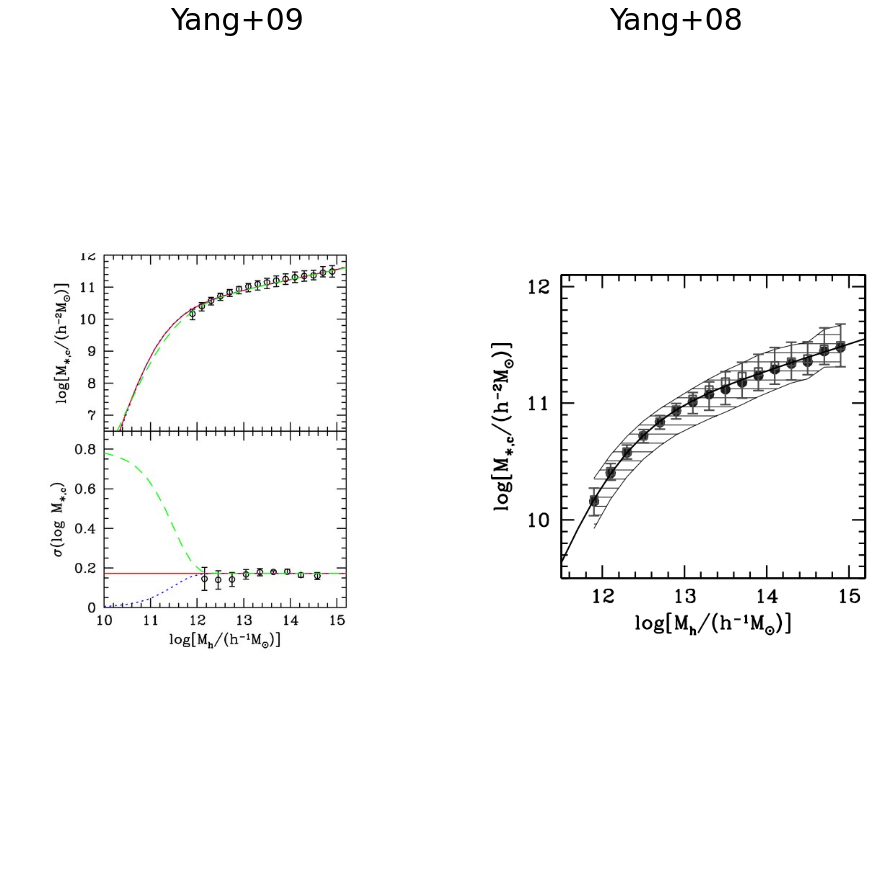

In [11]:

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cbook as cbook


image0 = plt.imread('Fig6_Yang08.png')
image1 = plt.imread('Fig8_Yang09.png')

fig, axar  = plt.subplots(1,2, sharex=True,figsize=(15,15))
im0 = axar[0].imshow(image1)
im1 = axar[1].imshow(image0)

axar[0].set_title ('Yang+09', size=30)
axar[1].set_title ('Yang+08', size=30)
axar[0].axis('off')
axar[1].axis('off')
plt.subplots_adjust(wspace = 0.1, hspace=0.05)
plt.show()

In [12]:
# Yang+09 halo masses
# green = satellites
# red = centrals
import plotly.plotly as py
from plotly.graph_objs import *
from IPython.display import display, clear_output


# z = grp_id[idx]
satgrp_str = ['Group ID: '+i for i in map(str, grp_id[(flag==2)])]
bcggrp_str = ['Group ID: '+i for i in map(str, grp_id[(flag==1)])]

trace0 = Scatter(
    x=halo[(flag==2)],
    y=ms[(flag==2)],
    text = satgrp_str,
    mode='markers',
    name='satellites',
    marker=Marker(
        color='green',
        symbol='.'
        )
)
trace1 = Scatter(
    x=halo[(flag==1)],
    y=ms[(flag==1)],
    text = bcggrp_str,
    name='centrals',
    mode='markers',
    marker=Marker(
        color='red',
        symbol='.'
        )
)
    
trace2 = Scatter(
    x= np.log10(Mh),
    y= np.log10(ms_logical),
    mode='lines',
    name='Yang+09 func',
    line=Line(
        color='blue',
        width=2,
    )
)

trace3 = Scatter(
    x= np.log10(Mh),
    y= np.log10(ms_logical_1),
    mode='lines',
    name='Yang+08 func',
    line=Line(
        color='black',
        width=2,
        dash='dash'
    )
)    


data = Data([trace1, trace0, trace2, trace3])

layout = Layout(
    title='All Galaxies',
    hovermode='closest',
    xaxis=XAxis(
        title='Log Mh (Msol)',        
        range=[10, 15],
        showgrid=True,
        zeroline=True,
        showline=True,
        mirror='ticks',
        gridcolor='#bdbdbd',
        gridwidth=0.5,
        zerolinecolor='#969696',
        zerolinewidth=4,
        linecolor='#636363',
        linewidth=1
    ),
    yaxis=YAxis(
        title='Log M* (Msol)',
        range=[7, 12],
        showgrid=True,
        zeroline=True,
        showline=True,
        mirror='ticks',
        gridcolor='#bdbdbd',
        gridwidth=0.5,
        zerolinecolor='#969696',
        zerolinewidth=4,
        linecolor='#636363',
        linewidth=1
    )
)

fig = Figure(data=data, layout=layout)

filename = 'Mh-M* all galaxies'
plot_url = py.iplot(fig, filename=filename) # plot to website
py.iplot(fig, filename=filename)


In [13]:
# Permalink:https: https://plot.ly/~thbrown/39/log-m-msol-vs-log-mh-msol/
# Get this figure: fig = py.get_figure("https://plot.ly/~thbrown/39/")
# Get this figure's data: data = py.get_figure("https://plot.ly/~thbrown/39/").get_data()
# Add data to this figure: py.plot(Data([Scatter(x=[1, 2], y=[2, 3])]), filename ="Mh-M*", fileopt="extend"))
# Get y data of first trace: y1 = py.get_figure("https://plot.ly/~thbrown/39/").get_data()[0]["y"]

import plotly.plotly as py
from plotly.graph_objs import *
from IPython.display import display, clear_output

x = halo[idx]
y = ms[idx]
z = grp_id[idx]
satgrp_str = ['Group ID: '+i for i in map(str, z[(flag[idx]==2)])]
bcggrp_str = ['Group ID: '+i for i in map(str, z[(flag[idx]==1)])]

trace0 = Scatter(
    x=x[(flag[idx]==2)],
    y=y[(flag[idx]==2)],
    text = satgrp_str,
    mode='markers',
    name='satellites',
    marker=Marker(
        color='green',
        symbol='.'
        )
)
trace1 = Scatter(
    x=x[(flag[idx]==1)],
    y=y[(flag[idx]==1)],
    text = bcggrp_str,
    name='centrals',
    mode='markers',
    marker=Marker(
        color='red',
        symbol='.'
        )
)
    
trace2 = Scatter(
    x= np.log10(Mh),
    y= np.log10(ms_logical),
    mode='lines',
    name='Yang+09 func',
    line=Line(
        color='blue',
        width=1,
    )
)    

data = Data([trace0, trace1, trace2])

layout = Layout(
    title='Small Groups',
    hovermode='closest',
    xaxis=XAxis(
        title='Log Mh (Msol)',        
        range=[10, 15],
        showgrid=True,
        zeroline=True,
        showline=True,
        mirror='ticks',
        gridcolor='#bdbdbd',
        gridwidth=0.5,
        zerolinecolor='#969696',
        zerolinewidth=4,
        linecolor='#636363',
        linewidth=1
    ),
    yaxis=YAxis(
        title='Log M* (Msol)',
        range=[7, 12],
        showgrid=True,
        zeroline=True,
        showline=True,
        mirror='ticks',
        gridcolor='#bdbdbd',
        gridwidth=0.5,
        zerolinecolor='#969696',
        zerolinewidth=4,
        linecolor='#636363',
        linewidth=1
    )
)

fig = Figure(data=data, layout=layout)


filename = 'Mh-M* small groups'
# plot_url = py.iplot(fig, filename=filename) # plot to website
py.iplot(fig, filename=filename)




In [14]:
# # in some groups central M* is less than satellite M* 
# print 'grp ID: ', grp_id[(grp_id == 65980)][0]
# print 'flag: ',flag[(grp_id == 65980)]
# print 'log M*: ',ms[(grp_id == 65980)]
# print 'log Mh: ',halo[(grp_id == 65980)]
# print ''

# print 'grp ID: ',grp_id[(grp_id == 8864 )][0]
# print 'flag: ',flag[(grp_id == 8864 )]
# print 'log M*: ',ms[(grp_id == 8864 )]
# print 'log Mh: ',halo[(grp_id == 8864 )]
# print ''

# print 'grp ID: ',grp_id[(grp_id == 27796  )][0]
# print 'flag: ',flag[(grp_id == 27796)]
# print 'log M*: ',ms[(grp_id == 27796)]
# print 'log Mh: ',halo[(grp_id == 27796)]
# print ''


23513 23513

text file writen to /Users/thbrown/AA_project/TOBY_STACKING/SAMPLES/FULL/constituent_tables/ID_halo_mass_cat
